In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from my_neural_network import MyNeuralNetwork
import matplotlib.pyplot as plt

In [2]:
# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
# Load the dataset
url = "https://raw.githubusercontent.com/raccamateo/NEC_BP_LR/main/normalized_synthetic_data.csv"
ml_data = pd.read_csv(url)

In [4]:
# Separate features (X) and target variable (y) using iloc to select the last column
X = ml_data.iloc[:, :-1]  # All rows, all columns except the last
y = ml_data.iloc[:, -1]   # All rows, only the last column

In [5]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize and train the custom neural network
num_features = X_train.shape[1]
my_nn = MyNeuralNetwork(
    num_layers=5,
    units_per_layer=[num_features, 9, 6, 9, 1],
    num_epochs=50,
    learning_rate=0.01,
    momentum=0.75,
    validation_split=0.2
)
my_nn.fit(X_train.values, y_train.values)

In [7]:
# Predict with the trained model
my_nn_predictions = my_nn.predict(X_val.values)

In [8]:
# Calculate Mean Squared Error and MAPE for the model
my_nn_mse = mean_squared_error(y_val, my_nn_predictions)
my_nn_mape = mean_absolute_percentage_error(y_val, my_nn_predictions)

In [9]:
# Print the MAPE
print(f"Mean Absolute Percentage Error (MyNeuralNetwork): {my_nn_mape}")

Mean Absolute Percentage Error (MyNeuralNetwork): 69.78863709917277


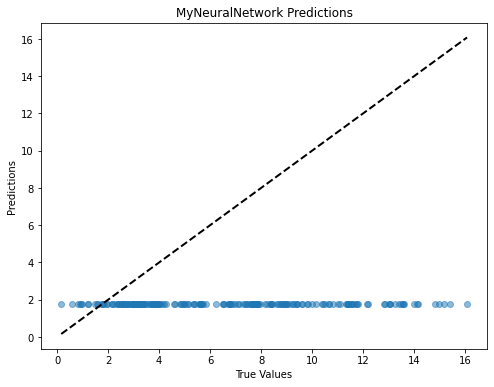

In [10]:
# Scatter plot to visualize the predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_val, my_nn_predictions, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.title('MyNeuralNetwork Predictions')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

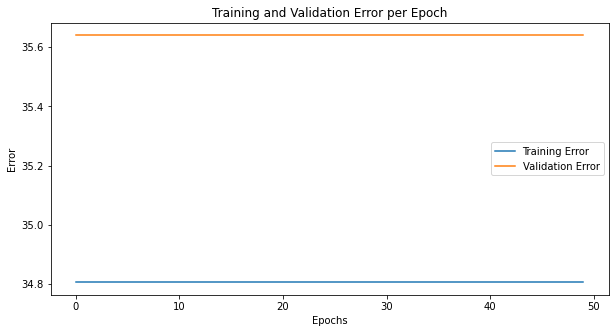

In [11]:
# Plotting training and validation errors
training_errors, validation_errors = my_nn.loss_epochs()
plt.figure(figsize=(10, 5))
plt.plot(training_errors, label='Training Error')
plt.plot(validation_errors, label='Validation Error')
plt.title('Training and Validation Error per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()